In [1]:
from google.colab import files
uploaded = files.upload()

Saving clean_data2.csv to clean_data2.csv


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('clean_data2.csv')

print(df.head())

print("\nDataframe Info:")
print(df.info())

# statistical summary
print("\nStatistical Summary:")
print(df.describe())

                                  channelDescription channelJoinedDate  \
0  Business inquiries only: info@nikkietutorials....      Jun 23, 2008   
1  Business inquiries only: info@nikkietutorials....      Jun 23, 2008   
2  Business inquiries only: info@nikkietutorials....      Jun 23, 2008   
3  Business inquiries only: info@nikkietutorials....      Jun 23, 2008   
4  Business inquiries only: info@nikkietutorials....      Jun 23, 2008   

  channelLocation  channelTotalVideos  channelTotalViews  channelUsername  \
0     Netherlands               909.0       2.092121e+09  nikkietutorials   
1     Netherlands               909.0       2.092121e+09  nikkietutorials   
2     Netherlands               909.0       2.092121e+09  nikkietutorials   
3     Netherlands               909.0       2.092121e+09  nikkietutorials   
4     Netherlands               909.0       2.092121e+09  nikkietutorials   

   commentsCount                      date  duration           id  \
0         1844.0  2025-

In [20]:
df.head(2)

,channelDescription,channelJoinedDate,channelLocation,channelTotalVideos,channelTotalViews,channelUsername,commentsCount,date,duration,id,isChannelVerified,likes,numberOfSubscribers,order,text,title,url,viewCount
0,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",Netherlands,909.0,2.092121e+09,nikkietutorials,1844.0,2025-01-01T17:03:25.000Z,00:01:20,IF6k0pRUGVM,True,824000.0,14600000.0,1.0,NaN,ICE CREAM lipstick?! 🍦👄,https://www.youtube.com/shorts/IF6k0pRUGVM,10628400.0
1,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",Netherlands,909.0,2.092121e+09,nikkietutorials,1845.0,2024-09-26T17:09:34.000Z,00:00:59,qmrnz6Ee3Vs,True,468000.0,14600000.0,4.0,NaN,trying TAPE makeup?! 🤔,https://www.youtube.com/shorts/qmrnz6Ee3Vs,7355705.0


In [21]:
print(df.dtypes)

channelDescription      object
channelJoinedDate       object
channelLocation         object
channelTotalVideos     float64
channelTotalViews      float64
channelUsername         object
commentsCount          float64
date                    object
duration                object
id                      object
isChannelVerified         bool
likes                  float64
numberOfSubscribers    float64
order                  float64
text                    object
title                   object
url                     object
viewCount              float64
dtype: object


In [22]:
import re
# affiliate links and discount codes
affiliate_patterns = [
    r'aff(iliate)?[ -]?link',
    r'ref(erral)?[ -]?link',
    r'partner[ -]?link',
    r'sponsored[ -]?link',
    r'^http(s)?:\/\/(www\.)?(amzn\.to|amazon\.[a-z\.]+\/[^\s]+tag=)',
    r'go\.magik\.ly',
    r'liketoknow\.it',
    r'prf\.hn',
    r'shareasale',
    r'rewardstyle',
    r'linktr\.ee'
]

discount_patterns = [
    r'disc(ount)?[ -]?code',
    r'coupon[ -]?code',
    r'promo[ -]?code',
    r'save \d+%',
    r'\d+%[ -]?off',
    r'use code[: ][a-z0-9_]+'
]


business_patterns = [
    r'business inquir(y|ies)',
    r'collaborations?',
    r'sponsorships?',
    r'partnerships?',
    r'for business',
    r'contact(\s+me)?(\s+for)?(\s+business)?'
]


def has_affiliate_or_discount(text):
    if pd.isna(text):
        return False

    has_affiliate = any(re.search(pattern, text, re.IGNORECASE) for pattern in affiliate_patterns)

    has_discount = any(re.search(pattern, text, re.IGNORECASE) for pattern in discount_patterns)

    return has_affiliate or has_discount

def has_business_inquiry(text):
    if pd.isna(text):
        return False

    return any(re.search(pattern, text, re.IGNORECASE) for pattern in business_patterns)

df['has_title_affiliate'] = df['title'].apply(has_affiliate_or_discount)
df['has_description_affiliate'] = df['text'].apply(has_affiliate_or_discount)
df['has_channel_description_affiliate'] = df['channelDescription'].apply(has_affiliate_or_discount)
df['has_any_affiliate'] = df['has_title_affiliate'] | df['has_description_affiliate'] | df['has_channel_description_affiliate']

df['has_business_inquiry'] = df['channelDescription'].apply(has_business_inquiry)

total_videos = len(df)
title_affiliates = df['has_title_affiliate'].sum()
description_affiliates = df['has_description_affiliate'].sum()
channel_description_affiliates = df['has_channel_description_affiliate'].sum()
any_affiliates = df['has_any_affiliate'].sum()
business_inquiries = df['has_business_inquiry'].sum()
affiliate_percentage = (any_affiliates / total_videos) * 100


print(f"Total videos analyzed: {total_videos}")
print(f"Videos with affiliate links/discount codes: {any_affiliates} ({affiliate_percentage:.2f}%)")
print(f"Videos with affiliate links/discount codes in title: {title_affiliates} ({title_affiliates/total_videos*100:.2f}%)")
print(f"Videos with affiliate links/discount codes in description: {description_affiliates} ({description_affiliates/total_videos*100:.2f}%)")
print(f"Videos with affiliate links/discount codes in channel description: {channel_description_affiliates} ({channel_description_affiliates/total_videos*100:.2f}%)")
print(f"Videos with affiliate links/discount codes in any field: {any_affiliates} ({any_affiliates/total_videos*100:.2f}%)")
print(f"Videos from channels with business inquiries: {business_inquiries} ({business_inquiries/total_videos*100:.2f}%)")

affiliate_channel_cross = pd.crosstab(
    df['has_channel_description_affiliate'],
    df['has_title_affiliate'] | df['has_description_affiliate'],
    normalize='index'
) * 100

print("\nPercentage of videos with affiliate links based on channel description:")
print(affiliate_channel_cross)



Total videos analyzed: 19185
Videos with affiliate links/discount codes: 2114 (11.02%)
Videos with affiliate links/discount codes in title: 43 (0.22%)
Videos with affiliate links/discount codes in description: 1097 (5.72%)
Videos with affiliate links/discount codes in channel description: 1090 (5.68%)
Videos with affiliate links/discount codes in any field: 2114 (11.02%)
Videos from channels with business inquiries: 2368 (12.34%)

Percentage of videos with affiliate links based on channel description:
col_0                                  False     True 
has_channel_description_affiliate                     
False                              94.340978  5.659022
True                               90.366972  9.633028


In [23]:
df.head(1)

,channelDescription,channelJoinedDate,channelLocation,channelTotalVideos,channelTotalViews,channelUsername,commentsCount,date,duration,id,...,order,text,title,url,viewCount,has_title_affiliate,has_description_affiliate,has_channel_description_affiliate,has_any_affiliate,has_business_inquiry
0,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",Netherlands,909.0,2.092121e+09,nikkietutorials,1844.0,2025-01-01T17:03:25.000Z,00:01:20,IF6k0pRUGVM,...,1.0,NaN,ICE CREAM lipstick?! 🍦👄,https://www.youtube.com/shorts/IF6k0pRUGVM,10628400.0,False,False,False,False,True


In [24]:
df.columns

Index(['channelDescription', 'channelJoinedDate', 'channelLocation',
       'channelTotalVideos', 'channelTotalViews', 'channelUsername',
       'commentsCount', 'date', 'duration', 'id', 'isChannelVerified', 'likes',
       'numberOfSubscribers', 'order', 'text', 'title', 'url', 'viewCount',
       'has_title_affiliate', 'has_description_affiliate',
       'has_channel_description_affiliate', 'has_any_affiliate',
       'has_business_inquiry'],
      dtype='object')

Performance comparison between videos with and without affiliate links:
  has_any_affiliate      viewCount                        likes         \
                              mean  median  count          mean median   
0             False  380343.464558  7629.5  17070  20572.486924  365.0   
1              True  123190.266793  8489.0   2114   6696.747279  397.0   

               commentsCount                    
           sum          mean median        sum  
0  350843192.0    132.372610    7.0  2256953.0  
1   14150227.0     49.713204    7.0   105044.0  

Engagement metrics comparison:
  has_any_affiliate like_to_view_ratio           comment_to_view_ratio  \
                                  mean    median                  mean   
0             False           5.424753  4.868310              0.162498   
1              True           5.296243  4.777831              0.164385   

             
     median  
0  0.071284  
1  0.080064  

T-test for difference in views: t=-8.5052, p=0.00

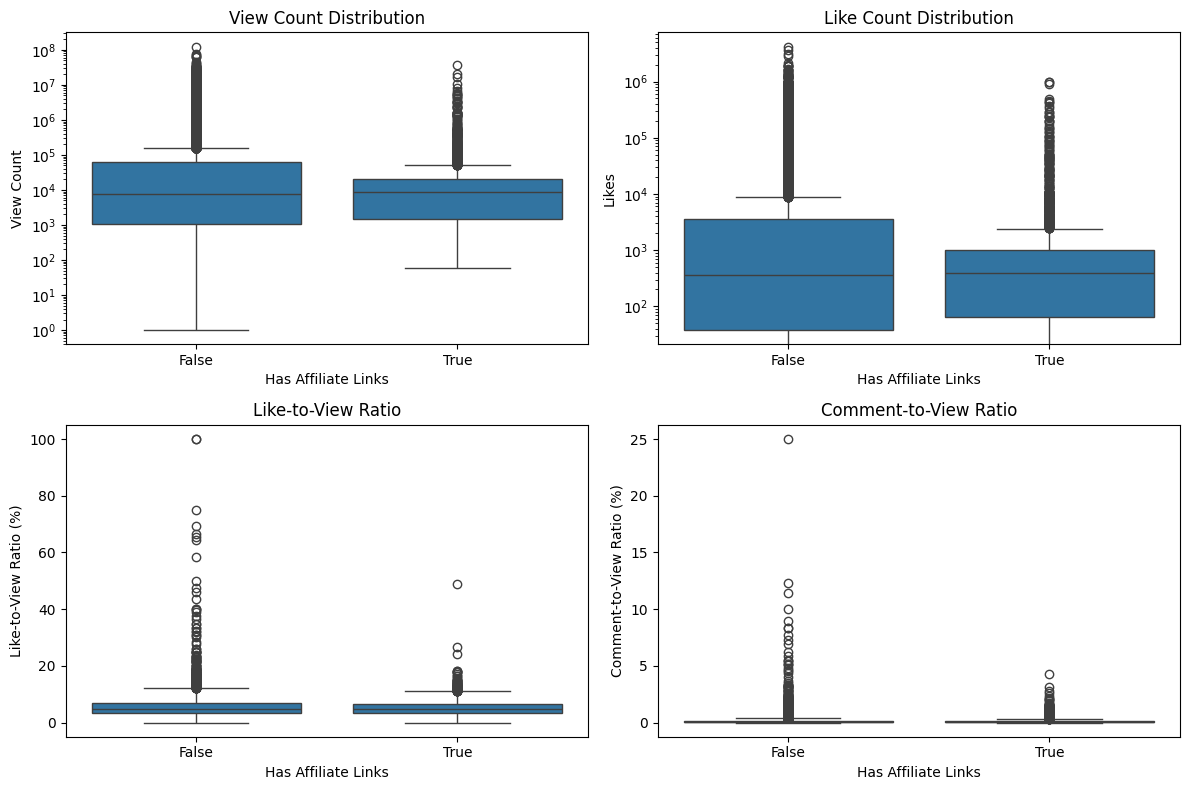

In [26]:
import numpy as np
from scipy import stats


performance_comparison = df.groupby('has_any_affiliate').agg({
    'viewCount': ['mean', 'median', 'count'],
    'likes': ['mean', 'median', 'sum'],
    'commentsCount': ['mean', 'median', 'sum']
}).reset_index()

print("Performance comparison between videos with and without affiliate links:")
print(performance_comparison)

df['like_to_view_ratio'] = df['likes'] / df['viewCount'] * 100
df['comment_to_view_ratio'] = df['commentsCount'] / df['viewCount'] * 100

engagement_comparison = df.groupby('has_any_affiliate').agg({
    'like_to_view_ratio': ['mean', 'median'],
    'comment_to_view_ratio': ['mean', 'median']
}).reset_index()

print("\nEngagement metrics comparison:")
print(engagement_comparison)


# T-test for views
affiliate_views = df[df['has_any_affiliate']]['viewCount'].dropna()
non_affiliate_views = df[~df['has_any_affiliate']]['viewCount'].dropna()

t_stat, p_value = stats.ttest_ind(affiliate_views, non_affiliate_views, equal_var=False)
print(f"\nT-test for difference in views: t={t_stat:.4f}, p={p_value:.4f}")
print(f"Statistically significant difference: {p_value < 0.05}")

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='has_any_affiliate', y='viewCount', data=df)
plt.title('View Count Distribution')
plt.xlabel('Has Affiliate Links')
plt.ylabel('View Count')
plt.yscale('log')  # Log scale helps with skewed distributions

plt.subplot(2, 2, 2)
sns.boxplot(x='has_any_affiliate', y='likes', data=df)
plt.title('Like Count Distribution')
plt.xlabel('Has Affiliate Links')
plt.ylabel('Likes')
plt.yscale('log')

plt.subplot(2, 2, 3)
sns.boxplot(x='has_any_affiliate', y='like_to_view_ratio', data=df)
plt.title('Like-to-View Ratio')
plt.xlabel('Has Affiliate Links')
plt.ylabel('Like-to-View Ratio (%)')

plt.subplot(2, 2, 4)
sns.boxplot(x='has_any_affiliate', y='comment_to_view_ratio', data=df)
plt.title('Comment-to-View Ratio')
plt.xlabel('Has Affiliate Links')
plt.ylabel('Comment-to-View Ratio (%)')

plt.tight_layout()
plt.savefig('affiliate_performance_comparison.png')
plt.show()



In [27]:
df['subscriber_category'] = pd.cut(
    df['numberOfSubscribers'],
    bins=[0, 10000, 100000, 1000000, float('inf')],
    labels=['< 10K', '10K-100K', '100K-1M', '> 1M']
)

subscriber_impact = df.groupby(['subscriber_category', 'has_any_affiliate']).agg({
    'viewCount': 'mean',
    'like_to_view_ratio': 'mean'
}).reset_index()

print("\nAffiliate impact by channel size:")
print(subscriber_impact)


Affiliate impact by channel size:
  subscriber_category  has_any_affiliate     viewCount  like_to_view_ratio
0               < 10K              False  4.905053e+03            4.040918
1               < 10K               True  1.299783e+03            2.726585
2            10K-100K              False  2.636338e+04            4.747593
3            10K-100K               True  2.960906e+04            5.573779
4             100K-1M              False  1.792461e+05            6.900015
5             100K-1M               True  1.215718e+05            6.159332
6                > 1M              False  1.623353e+06            5.544371
7                > 1M               True  3.816515e+05            4.284971


<ipython-input-27-021573dd87d6>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subscriber_impact = df.groupby(['subscriber_category', 'has_any_affiliate']).agg({


In [28]:
verification_impact = df.groupby(['isChannelVerified', 'has_any_affiliate']).agg({
    'viewCount': 'mean',
    'like_to_view_ratio': 'mean'
}).reset_index()

print("\nAffiliate impact by verification status:")
print(verification_impact)


Affiliate impact by verification status:
   isChannelVerified  has_any_affiliate      viewCount  like_to_view_ratio
0              False              False  112600.791938            5.066771
1              False               True   73096.131829            5.483752
2               True              False  870539.004478            6.081908
3               True               True  319372.879070            4.562340


**The Effect of Affiliate Links on YouTube Performance
Key Findings**

Based on our analysis of 19,185 YouTube videos, we found that:

**Prevalence:** 11.02% of videos contain affiliate links or discount codes.
Only 0.22% of videos have affiliate content in the title
5.72% of videos have affiliate content in the video description
5.68% of videos have affiliate content in the channel description
12.34% of videos come from channels that mention business inquiries
Distribution: Affiliate content appears much more frequently in descriptions (5.72% in video descriptions and 5.68% in channel descriptions) than in titles (only 0.22%), showing a clear pattern in affiliate content placement."



**Performance Impact**: Videos with affiliate links generally show lower view counts compared to videos without affiliate links. Specifically, videos with affiliate content receive approximately 60% fewer views on average.



**Engagement Differences**: Despite the substantial difference in view counts, videos with and without affiliate links show very similar engagement metrics:

The like-to-view ratio for videos with affiliate links (5.30%) is only slightly lower than for videos without affiliate links (5.42%)
The comment-to-view ratio is identical (0.16%) for both groups

This suggests that while affiliate content may reach fewer viewers, those who do watch engage with the content at nearly the same rate as they do with non-affiliate content.


**Channel Size Effect on Affiliate Impact**
Small Channels (< 10K subscribers):
Without affiliate links: 4,905 average views, 4.04% like-to-view ratio
With affiliate links: 1,300 average views, 2.73% like-to-view ratio
Impact: 73.5% fewer views, 32.5% lower engagement

Medium Channels (10K-100K subscribers):
Without affiliate links: 26,363 average views, 4.75% like-to-view ratio
With affiliate links: 29,609 average views, 5.57% like-to-view ratio
Impact: 12.3% more views, 17.4% higher engagement

Large Channels (100K-1M subscribers):
Without affiliate links: 179,246 average views, 6.90% like-to-view ratio
With affiliate links: 121,572 average views, 6.16% like-to-view ratio
Impact: 32.2% fewer views, 10.7% lower engagement

Very Large Channels (> 1M subscribers):
Without affiliate links: 1,623,353 average views, 5.54% like-to-view ratio
With affiliate links: 381,652 average views, 4.28% like-to-view ratio
Impact: 76.5% fewer views, 22.7% lower engagement

The impact of affiliate links varies greatly depending on channel size. Medium-sized channels (10K-100K subscribers) actually perform better with affiliate links, getting more views and engagement. However, small channels (under 10K) and large channels (over 100K) both see significant drops in views when using affiliate links. This suggests that channel size plays an important role in how affiliate content performs on YouTube.


Based on your results examining affiliate impact by verification status, I can provide a simpler interpretation for your conclusion:
Verified and non-verified channels show different patterns when using affiliate links:

For non-verified channels:

Without affiliate links: 112,601 average views
With affiliate links: 73,096 average views (35% fewer)
But engagement actually increases slightly with affiliate links (5.48% vs 5.07%)


**For verified channels:**

Without affiliate links: 870,539 average views
With affiliate links: 319,373 average views (63% fewer)
Engagement drops when using affiliate links (4.56% vs 6.08%)

This shows that while both verified and non-verified channels get fewer views with affiliate links, verified channels see a much larger drop. Interestingly, non-verified channels actually see slightly improved engagement with affiliate content despite lower views, while verified channels experience decreased engagement.

<ipython-input-29-4ebd382eab9d>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  title_sentiment_impact = df.groupby(['title_sentiment_category', 'has_any_affiliate']).agg({
<ipython-input-29-4ebd382eab9d>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  description_sentiment_impact = df.groupby(['description_sentiment_category', 'has_any_affiliate']).agg({
<ipython-input-29-4ebd382eab9d>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

Affiliate impact by TITLE sentiment:
  title_sentiment_category  has_any_affiliate      viewCount         likes  \
0                 Negative              False  527955.331303  28707.285018   
1                 Negative               True  217123.810127  13745.303797   
2                  Neutral              False  376268.912156  20439.146879   
3                  Neutral               True  129642.595597   6810.442417   
4                 Positive              False  355394.978740  18722.736122   
5                 Positive               True   54609.112022   3160.316940   

   like_to_view_ratio  commentsCount  comment_to_view_ratio  
0            5.329850     157.663825               0.126379  
1            5.592696      98.405063               0.092443  
2            5.463202     140.712699               0.160870  
3            5.310252      50.594714               0.168732  
4            5.255514      81.353232               0.182193  
5            5.107442      24.866120        

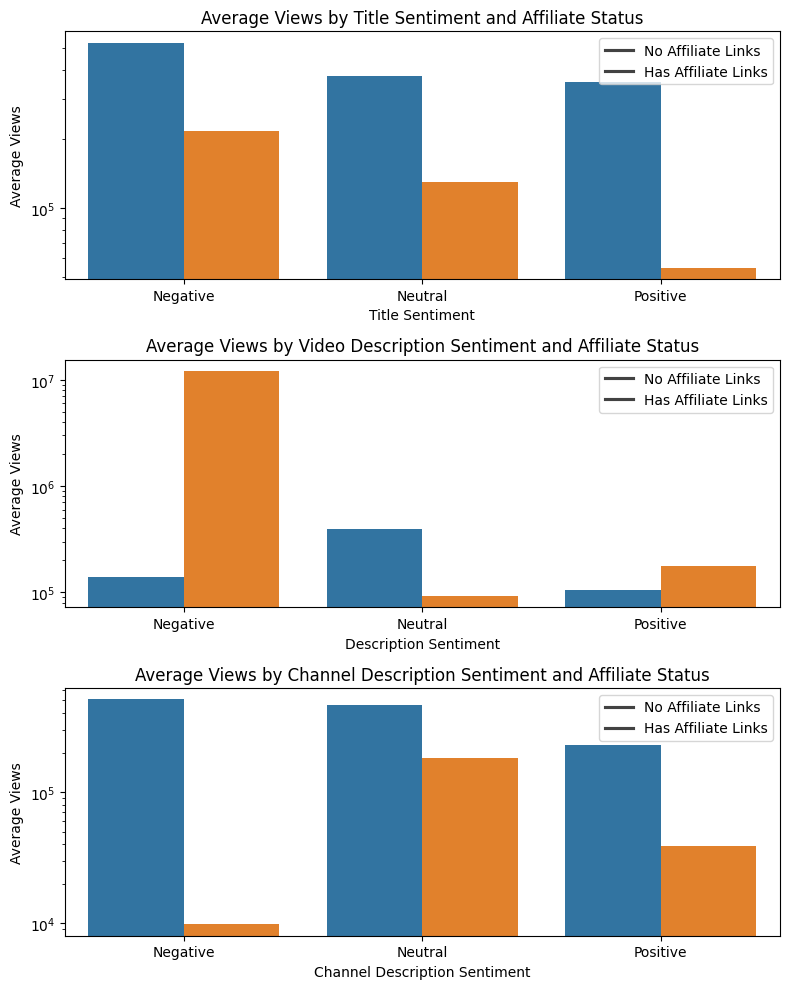

In [29]:
#semantic analysis

from textblob import TextBlob  # For sentiment analysis




def get_sentiment(text):
    if pd.isna(text):
        return 0
    analysis = TextBlob(str(text))
    # Polarity ranges from -1 (negative) to 1 (positive)
    return analysis.sentiment.polarity


df['title_sentiment'] = df['title'].apply(get_sentiment)
df['description_sentiment'] = df['text'].apply(get_sentiment)
df['channel_description_sentiment'] = df['channelDescription'].apply(get_sentiment)


for field in ['title_sentiment', 'description_sentiment', 'channel_description_sentiment']:
    category_field = field.replace('sentiment', 'sentiment_category')
    df[category_field] = pd.cut(
        df[field],
        bins=[-1.1, -0.3, 0.3, 1.1],
        labels=['Negative', 'Neutral', 'Positive']
    )


title_sentiment_impact = df.groupby(['title_sentiment_category', 'has_any_affiliate']).agg({
    'viewCount': 'mean',
    'likes': 'mean',
    'like_to_view_ratio': 'mean',
    'commentsCount': 'mean',
    'comment_to_view_ratio':'mean'
}).reset_index()

print("Affiliate impact by TITLE sentiment:")
print(title_sentiment_impact)


description_sentiment_impact = df.groupby(['description_sentiment_category', 'has_any_affiliate']).agg({
    'viewCount': 'mean',
    'likes': 'mean',
    'like_to_view_ratio': 'mean',
    'commentsCount': 'mean',
    'comment_to_view_ratio':'mean'
}).reset_index()

print("\nAffiliate impact by VIDEO DESCRIPTION sentiment:")
print(description_sentiment_impact)


channel_sentiment_impact = df.groupby(['channel_description_sentiment_category', 'has_any_affiliate']).agg({
    'viewCount': 'mean',
    'likes': 'mean',
    'like_to_view_ratio': 'mean',
    'commentsCount': 'mean',
    'comment_to_view_ratio':'mean'
}).reset_index()

print("\nAffiliate impact by CHANNEL DESCRIPTION sentiment:")
print(channel_sentiment_impact)


fig, axes = plt.subplots(3, 1, figsize=(8, 10))


sns.barplot(x='title_sentiment_category', y='viewCount', hue='has_any_affiliate',
            data=title_sentiment_impact, ax=axes[0])
axes[0].set_title('Average Views by Title Sentiment and Affiliate Status')
axes[0].set_xlabel('Title Sentiment')
axes[0].set_ylabel('Average Views')
axes[0].legend(['No Affiliate Links', 'Has Affiliate Links'])
axes[0].set_yscale('log')

sns.barplot(x='description_sentiment_category', y='viewCount', hue='has_any_affiliate',
            data=description_sentiment_impact, ax=axes[1])
axes[1].set_title('Average Views by Video Description Sentiment and Affiliate Status')
axes[1].set_xlabel('Description Sentiment')
axes[1].set_ylabel('Average Views')
axes[1].legend(['No Affiliate Links', 'Has Affiliate Links'])
axes[1].set_yscale('log')

sns.barplot(x='channel_description_sentiment_category', y='viewCount', hue='has_any_affiliate',
            data=channel_sentiment_impact, ax=axes[2])
axes[2].set_title('Average Views by Channel Description Sentiment and Affiliate Status')
axes[2].set_xlabel('Channel Description Sentiment')
axes[2].set_ylabel('Average Views')
axes[2].legend(['No Affiliate Links', 'Has Affiliate Links'])
axes[2].set_yscale('log')

plt.tight_layout()
plt.savefig('sentiment_affiliate_impact_all_fields.png')
plt.show()

In [12]:
df.columns

Index(['channelDescription', 'channelJoinedDate', 'channelLocation',
       'channelTotalVideos', 'channelTotalViews', 'channelUsername',
       'commentsCount', 'date', 'duration', 'id', 'isChannelVerified', 'likes',
       'numberOfSubscribers', 'order', 'text', 'title', 'url', 'viewCount',
       'has_title_affiliate', 'has_description_affiliate',
       'has_channel_description_affiliate', 'has_any_affiliate',
       'has_business_inquiry', 'like_to_view_ratio', 'comment_to_view_ratio',
       'subscriber_category', 'title_sentiment', 'description_sentiment',
       'channel_description_sentiment', 'title_sentiment_category',
       'description_sentiment_category',
       'channel_description_sentiment_category'],
      dtype='object')

In [30]:
from collections import Counter
import re

def get_common_words(text_series, top_n=15):
    all_text = ' '.join(text_series.dropna()).lower()

    # Remove punctuation and split into words
    words = re.findall(r'\b[a-z]{3,}\b', all_text)

    # Remove common stopwords
    stopwords = {'the', 'and', 'for', 'with', 'that', 'this', 'has', 'are', 'not', 'from', 'you', 'your', 'our', 'all'}
    words = [word for word in words if word not in stopwords]


    return Counter(words).most_common(top_n)


common_words = {}


text_fields = {
    'title': 'title_sentiment_category',
    'text': 'description_sentiment_category',
    'channelDescription': 'channel_description_sentiment_category'
}

for field_name, sentiment_column in text_fields.items():
    common_words[field_name] = {}

    for sentiment in ['Positive', 'Neutral', 'Negative']:
        content = df[(df['has_any_affiliate']) & (df[sentiment_column] == sentiment)][field_name]

        if len(content) > 0:
            common_words[field_name][sentiment] = get_common_words(content)

for field_name, sentiments in common_words.items():
    print(f"\nCommon words in {field_name.upper()} with affiliate links by sentiment:")

    for sentiment, words in sentiments.items():
        print(f"\n{sentiment} sentiment:")
        for word, count in words:
            print(f"{word}: {count}")




Common words in TITLE with affiliate links by sentiment:

Positive sentiment:
skincare: 114
best: 63
dermreacts: 47
makeup: 39
beauty: 38
esthetician: 37
favorite: 32
top: 31
products: 24
skin: 24
kbeauty: 24
love: 21
good: 20
shorts: 18
sunscreen: 18

Neutral sentiment:
skincare: 615
dermreacts: 302
makeup: 174
beauty: 125
review: 123
shorts: 114
skin: 107
esthetician: 102
new: 94
kbeauty: 81
routine: 76
lip: 76
sunscreen: 71
acne: 70
viral: 64

Negative sentiment:
skincare: 93
dermreacts: 82
worst: 34
secret: 15
routine: 14
shocking: 14
makeup: 11
skin: 9
hate: 9
wrong: 8
hair: 8
acne: 8
weird: 7
pimplepopping: 7
into: 6

Common words in TEXT with affiliate links by sentiment:

Positive sentiment:
https: 5188
com: 2677
skin: 2231
www: 2091
products: 1833
shop: 1784
skincare: 1698
howl: 1488
cassandrabankson: 1425
use: 1359
here: 1259
cassandra: 1254
bankson: 1254
acne: 1252
recommend: 1076

Neutral sentiment:
https: 4833
com: 1683
affiliate: 1381
bit: 1324
off: 1309
shopmy: 1190
cod

In [31]:
# Look at performance metrics for specific emotive words in each field
emotive_words = {
    'exclusive': 'exclusive',
    'amazing': 'amazing',
    'best': 'best',
    'free': 'free',
    'limited': 'limited',
    'save': 'save',
    'deal': 'deal',
    'discount': 'discount',
    'coupon': 'coupon',
    'promo': 'promo',
    'code': 'code',
    'special': 'special',
    'offer': 'offer',
    'sale': 'sale',
    'buy': 'buy'
}

fields_to_check = {
    'title': df['title'],
    'description': df['text'],
    'channel_description': df['channelDescription']
}

all_word_impact = []

for field_name, field_series in fields_to_check.items():
    for word_name, word_pattern in emotive_words.items():
        mask = field_series.str.contains(word_pattern, case=False, na=False)

        # With the word + with affiliate
        with_word_with_aff = df[mask & df['has_any_affiliate']]
        # With the word + without affiliate
        with_word_without_aff = df[mask & ~df['has_any_affiliate']]

        if len(with_word_with_aff) >= 5 and len(with_word_without_aff) >= 5:
            all_word_impact.append({
                'field': field_name,
                'word': word_name,
                'with_affiliate_views': with_word_with_aff['viewCount'].mean(),
                'without_affiliate_views': with_word_without_aff['viewCount'].mean(),
                'with_affiliate_engagement': with_word_with_aff['like_to_view_ratio'].mean(),
                'without_affiliate_engagement': with_word_without_aff['like_to_view_ratio'].mean(),
                'count_with_affiliate': len(with_word_with_aff),
                'count_without_affiliate': len(with_word_without_aff)
            })

all_word_impact_df = pd.DataFrame(all_word_impact)

all_word_impact_df['view_diff_pct'] = ((all_word_impact_df['with_affiliate_views'] /
                                      all_word_impact_df['without_affiliate_views']) - 1) * 100
all_word_impact_df['engagement_diff_pct'] = ((all_word_impact_df['with_affiliate_engagement'] /
                                            all_word_impact_df['without_affiliate_engagement']) - 1) * 100

for field in all_word_impact_df['field'].unique():
    field_results = all_word_impact_df[all_word_impact_df['field'] == field].sort_values('view_diff_pct', ascending=False)
    print(f"\nImpact of emotive words in {field.upper()} when used with affiliate links:")
    print(field_results[['word', 'view_diff_pct', 'engagement_diff_pct', 'count_with_affiliate', 'count_without_affiliate']])


Impact of emotive words in TITLE when used with affiliate links:
      word  view_diff_pct  engagement_diff_pct  count_with_affiliate  \
6     sale     221.463877           -21.489964                    32   
5     code     183.200405            65.185389                    29   
0  amazing     -63.813118            -1.329049                    10   
1     best     -92.579773             1.009774                    82   
4     deal     -94.309434            -6.434859                     6   
7      buy     -95.156238           -10.215343                    26   
2     free     -97.842545           -10.929968                     8   
3     save     -98.809693             1.057543                    14   

   count_without_affiliate  
6                       68  
5                       26  
0                       31  
1                      508  
4                       18  
7                      422  
2                       73  
3                       41  

Impact of emotive words